### 딥러닝 모형 실습 - Regression 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
import keras

C:\Users\SMART-24\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SMART-24\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SMART-24\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SMART-24\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
featureData = pd.read_csv('./data/feature_regression_example.csv')

sortKey = ["REGIONID","PRODUCTGROUP","PRODUCT","ITEM","YEARWEEK"]
featureData = featureData.sort_values(sortKey)
featureData.head()

##숫자형 컬럼 생성
featureData["HOLIDAY_YN"] = np.where(featureData.HOLIDAY=="Y",1,0)
featureData["PROMOTION_YN"] = np.where(featureData.PROMOTION == "Y",1,0)

In [3]:
featureData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
HOLIDAY_YN        int32
PROMOTION_YN      int32
dtype: object

In [4]:
##특정 주차 기준 분리
predictStd = 201630
train_dataset = featureData.query('YEARWEEK <= @predictStd')
test_dataset = featureData.query('YEARWEEK > @predictStd')

##인덱스 초기화
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

##답지 별도 분리
train_labels = train_dataset["QTY"]
test_labels = test_dataset["QTY"]

In [5]:
corr_result = train_dataset.corr()

#상관관계 계수 비율 선정
featuresStd = 0.6

features_key = corr_result[(abs(corr_result.QTY) >= 0.5) & (corr_result.QTY != 1)].index.tolist()
label_key = ['QTY']
full_key = features_key + label_key
#train_dataset[features_key].head()
#train_dataset[features_key].max()

In [6]:
def norm(x):
    return (x / x.max())
normed_train_data = norm(train_dataset[features_key])
normed_test_data = norm(test_dataset[features_key])
normed_train_data.head()

,HCLUS,PRO_PERCENT,HOLIDAY_YN,PROMOTION_YN
0,0.25,0.585834,1.0,1.0
1,1.00,0.585834,0.0,1.0
2,1.00,0.582233,0.0,1.0
3,0.50,0.582233,1.0,1.0
4,1.00,0.582233,0.0,1.0


In [7]:
##seed값 설정
seed = 20
np.random.seed(seed)
tf.set_random_seed(seed)

In [8]:
##뉴런 확인 - 레이어 방식 
##모델 생성

#Feature 컬럼의 개수

##normed_train_data 질문하기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
n_cols = normed_train_data.shape[1]

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(n_cols,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

model.summary()

# 모델 시각화
#from keras.utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

W0802 13:29:38.774707 10004 deprecation_wrapper.py:119] From C:\Users\SMART-24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 13:29:38.776707 10004 deprecation_wrapper.py:119] From C:\Users\SMART-24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 13:29:38.789708 10004 deprecation_wrapper.py:119] From C:\Users\SMART-24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [9]:
##page 81
##model compile
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error','mean_squared_error'])

##모델 학습 및 검증
from keras.callbacks import EarlyStopping
##에러율 정지 단 옵션 유지
early_stopping_monitor = EarlyStopping(patience=2000)
EPOCHS = 2000

##모델 훈련
history = model.fit(normed_train_data,train_labels,validation_split=0.2,epochs=EPOCHS,callbacks=[early_stopping_monitor])


W0802 13:29:38.830710 10004 deprecation_wrapper.py:119] From C:\Users\SMART-24\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 13:29:38.938716 10004 deprecation_wrapper.py:119] From C:\Users\SMART-24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0802 13:29:38.993719 10004 deprecation_wrapper.py:119] From C:\Users\SMART-24\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 66 samples, validate on 17 samples
Epoch 1/2000
66/66 [==============================] - 0s 3ms/step - loss: 1973243.7652 - mean_absolute_error: 1123.0306 - mean_squared_error: 1973243.7652 - val_loss: 1711485.1250 - val_mean_absolute_error: 1084.9946 - val_mean_squared_error: 1711485.1250
Epoch 2/2000
66/66 [==============================] - 0s 106us/step - loss: 1972928.0616 - mean_absolute_error: 1122.9003 - mean_squared_error: 1972928.0616 - val_loss: 1711182.1250 - val_mean_absolute_error: 1084.8647 - val_mean_squared_error: 1711182.1250
Epoch 3/2000
66/66 [==============================] - 0s 106us/step - loss: 1972625.1705 - mean_absolute_error: 1122.7773 - mean_squared_error: 1972625.1705 - val_loss: 1710880.6250 - val_mean_absolute_error: 1084.7349 - val_mean_squared_error: 1710880.6250
Epoch 4/2000
66/66 [==============================] - 0s 76us/step - loss: 1972320.4924 - mean_absolute_error: 1122.6533 - mean_squared_error: 1972320.4924 - val_loss: 1710563.0000 - v

Epoch 33/2000
66/66 [==============================] - 0s 76us/step - loss: 1929866.1894 - mean_absolute_error: 1105.4206 - mean_squared_error: 1929866.1894 - val_loss: 1663113.8750 - val_mean_absolute_error: 1064.4027 - val_mean_squared_error: 1663113.8750
Epoch 34/2000
66/66 [==============================] - 0s 61us/step - loss: 1925356.7404 - mean_absolute_error: 1103.6195 - mean_squared_error: 1925356.7404 - val_loss: 1658254.8750 - val_mean_absolute_error: 1062.3271 - val_mean_squared_error: 1658254.8750
Epoch 35/2000
66/66 [==============================] - 0s 61us/step - loss: 1920698.7457 - mean_absolute_error: 1101.7509 - mean_squared_error: 1920698.7457 - val_loss: 1653347.2500 - val_mean_absolute_error: 1060.2216 - val_mean_squared_error: 1653347.2500
Epoch 36/2000
66/66 [==============================] - 0s 76us/step - loss: 1915825.1515 - mean_absolute_error: 1099.8444 - mean_squared_error: 1915825.1515 - val_loss: 1648087.5000 - val_mean_absolute_error: 1057.9602 - val_m

Epoch 65/2000
66/66 [==============================] - 0s 61us/step - loss: 1580986.9091 - mean_absolute_error: 960.7503 - mean_squared_error: 1580986.9091 - val_loss: 1293789.7500 - val_mean_absolute_error: 910.7318 - val_mean_squared_error: 1293789.7500
Epoch 66/2000
66/66 [==============================] - 0s 61us/step - loss: 1561818.0999 - mean_absolute_error: 952.1790 - mean_squared_error: 1561818.0999 - val_loss: 1274373.1250 - val_mean_absolute_error: 902.9282 - val_mean_squared_error: 1274373.1250
Epoch 67/2000
66/66 [==============================] - 0s 76us/step - loss: 1542574.9848 - mean_absolute_error: 943.6929 - mean_squared_error: 1542574.9848 - val_loss: 1254633.8750 - val_mean_absolute_error: 894.9164 - val_mean_squared_error: 1254633.8750
Epoch 68/2000
66/66 [==============================] - 0s 76us/step - loss: 1522989.0455 - mean_absolute_error: 934.7805 - mean_squared_error: 1522989.0455 - val_loss: 1233522.8750 - val_mean_absolute_error: 886.2483 - val_mean_squa

66/66 [==============================] - 0s 61us/step - loss: 897034.2834 - mean_absolute_error: 634.5426 - mean_squared_error: 897034.2834 - val_loss: 623874.6250 - val_mean_absolute_error: 603.5590 - val_mean_squared_error: 623874.6250
Epoch 98/2000
66/66 [==============================] - 0s 76us/step - loss: 878324.7955 - mean_absolute_error: 624.9934 - mean_squared_error: 878324.7955 - val_loss: 606399.5625 - val_mean_absolute_error: 596.3298 - val_mean_squared_error: 606399.5625
Epoch 99/2000
66/66 [==============================] - 0s 76us/step - loss: 858069.1856 - mean_absolute_error: 615.7577 - mean_squared_error: 858069.1856 - val_loss: 588889.0000 - val_mean_absolute_error: 588.8149 - val_mean_squared_error: 588889.0000
Epoch 100/2000
66/66 [==============================] - 0s 76us/step - loss: 839249.9412 - mean_absolute_error: 606.8563 - mean_squared_error: 839249.9412 - val_loss: 571585.8750 - val_mean_absolute_error: 583.0340 - val_mean_squared_error: 571585.8750
Epoch

66/66 [==============================] - 0s 121us/step - loss: 513367.6023 - mean_absolute_error: 490.3107 - mean_squared_error: 513367.6023 - val_loss: 331936.2812 - val_mean_absolute_error: 499.4995 - val_mean_squared_error: 331936.2812
Epoch 130/2000
66/66 [==============================] - 0s 121us/step - loss: 507274.2931 - mean_absolute_error: 489.1876 - mean_squared_error: 507274.2931 - val_loss: 330059.5938 - val_mean_absolute_error: 499.3486 - val_mean_squared_error: 330059.5938
Epoch 131/2000
66/66 [==============================] - 0s 76us/step - loss: 502612.4408 - mean_absolute_error: 488.2666 - mean_squared_error: 502612.4408 - val_loss: 328551.1562 - val_mean_absolute_error: 498.9979 - val_mean_squared_error: 328551.1562
Epoch 132/2000
66/66 [==============================] - 0s 76us/step - loss: 499326.4394 - mean_absolute_error: 487.7136 - mean_squared_error: 499326.4394 - val_loss: 327096.0625 - val_mean_absolute_error: 498.7513 - val_mean_squared_error: 327096.0625
E

66/66 [==============================] - 0s 76us/step - loss: 440687.9044 - mean_absolute_error: 474.7359 - mean_squared_error: 440687.9044 - val_loss: 310482.0312 - val_mean_absolute_error: 498.5504 - val_mean_squared_error: 310482.0312
Epoch 162/2000
66/66 [==============================] - 0s 61us/step - loss: 439839.9058 - mean_absolute_error: 473.8979 - mean_squared_error: 439839.9058 - val_loss: 309120.5625 - val_mean_absolute_error: 497.2707 - val_mean_squared_error: 309120.5625
Epoch 163/2000
66/66 [==============================] - 0s 76us/step - loss: 439028.1925 - mean_absolute_error: 472.6945 - mean_squared_error: 439028.1925 - val_loss: 307697.7500 - val_mean_absolute_error: 495.9223 - val_mean_squared_error: 307697.7500
Epoch 164/2000
66/66 [==============================] - 0s 76us/step - loss: 438362.9034 - mean_absolute_error: 471.6389 - mean_squared_error: 438362.9034 - val_loss: 306353.6562 - val_mean_absolute_error: 494.6368 - val_mean_squared_error: 306353.6562
Epo

66/66 [==============================] - 0s 61us/step - loss: 407876.8248 - mean_absolute_error: 459.6409 - mean_squared_error: 407876.8248 - val_loss: 298168.6875 - val_mean_absolute_error: 482.6263 - val_mean_squared_error: 298168.6875
Epoch 194/2000
66/66 [==============================] - 0s 76us/step - loss: 407116.0471 - mean_absolute_error: 458.5018 - mean_squared_error: 407116.0471 - val_loss: 296703.2188 - val_mean_absolute_error: 481.1902 - val_mean_squared_error: 296703.2188
Epoch 195/2000
66/66 [==============================] - 0s 61us/step - loss: 406643.3158 - mean_absolute_error: 457.6123 - mean_squared_error: 406643.3158 - val_loss: 295287.7500 - val_mean_absolute_error: 479.7854 - val_mean_squared_error: 295287.7500
Epoch 196/2000
66/66 [==============================] - 0s 61us/step - loss: 406149.0665 - mean_absolute_error: 456.7743 - mean_squared_error: 406149.0665 - val_loss: 294314.7188 - val_mean_absolute_error: 478.8285 - val_mean_squared_error: 294314.7188
Epo

66/66 [==============================] - 0s 61us/step - loss: 383425.2961 - mean_absolute_error: 446.8835 - mean_squared_error: 383425.2961 - val_loss: 297226.1562 - val_mean_absolute_error: 490.8938 - val_mean_squared_error: 297226.1562
Epoch 226/2000
66/66 [==============================] - 0s 76us/step - loss: 382747.1785 - mean_absolute_error: 446.5168 - mean_squared_error: 382747.1785 - val_loss: 297115.2500 - val_mean_absolute_error: 491.1764 - val_mean_squared_error: 297115.2500
Epoch 227/2000
66/66 [==============================] - 0s 61us/step - loss: 382097.5909 - mean_absolute_error: 446.0295 - mean_squared_error: 382097.5909 - val_loss: 296829.0312 - val_mean_absolute_error: 491.2290 - val_mean_squared_error: 296829.0312
Epoch 228/2000
66/66 [==============================] - 0s 61us/step - loss: 381539.5921 - mean_absolute_error: 445.6000 - mean_squared_error: 381539.5921 - val_loss: 297178.5625 - val_mean_absolute_error: 492.1507 - val_mean_squared_error: 297178.5625
Epo

66/66 [==============================] - 0s 61us/step - loss: 367545.7930 - mean_absolute_error: 431.9248 - mean_squared_error: 367545.7930 - val_loss: 284489.0938 - val_mean_absolute_error: 482.5157 - val_mean_squared_error: 284489.0938
Epoch 258/2000
66/66 [==============================] - 0s 61us/step - loss: 367060.1354 - mean_absolute_error: 432.0825 - mean_squared_error: 367060.1354 - val_loss: 285542.2500 - val_mean_absolute_error: 484.1522 - val_mean_squared_error: 285542.2500
Epoch 259/2000
66/66 [==============================] - 0s 45us/step - loss: 366533.9699 - mean_absolute_error: 432.1468 - mean_squared_error: 366533.9699 - val_loss: 285933.9375 - val_mean_absolute_error: 484.8386 - val_mean_squared_error: 285933.9375
Epoch 260/2000
66/66 [==============================] - 0s 61us/step - loss: 366176.7256 - mean_absolute_error: 432.0726 - mean_squared_error: 366176.7256 - val_loss: 286449.0312 - val_mean_absolute_error: 485.6633 - val_mean_squared_error: 286449.0312
Epo

66/66 [==============================] - 0s 76us/step - loss: 358475.0882 - mean_absolute_error: 420.0514 - mean_squared_error: 358475.0882 - val_loss: 263617.5312 - val_mean_absolute_error: 456.9236 - val_mean_squared_error: 263617.5312
Epoch 290/2000
66/66 [==============================] - 0s 76us/step - loss: 358537.0511 - mean_absolute_error: 419.7502 - mean_squared_error: 358537.0511 - val_loss: 262290.4375 - val_mean_absolute_error: 454.8817 - val_mean_squared_error: 262290.4375
Epoch 291/2000
66/66 [==============================] - 0s 61us/step - loss: 358739.0251 - mean_absolute_error: 419.3890 - mean_squared_error: 358739.0251 - val_loss: 260922.5312 - val_mean_absolute_error: 452.7385 - val_mean_squared_error: 260922.5312
Epoch 292/2000
66/66 [==============================] - 0s 91us/step - loss: 358868.6061 - mean_absolute_error: 419.0031 - mean_squared_error: 358868.6061 - val_loss: 261565.4688 - val_mean_absolute_error: 453.8848 - val_mean_squared_error: 261565.4688
Epo

66/66 [==============================] - 0s 106us/step - loss: 350738.4474 - mean_absolute_error: 420.3837 - mean_squared_error: 350738.4474 - val_loss: 284981.2500 - val_mean_absolute_error: 486.9300 - val_mean_squared_error: 284981.2500
Epoch 322/2000
66/66 [==============================] - 0s 91us/step - loss: 350564.0227 - mean_absolute_error: 420.6188 - mean_squared_error: 350564.0227 - val_loss: 287030.9375 - val_mean_absolute_error: 489.2603 - val_mean_squared_error: 287030.9375
Epoch 323/2000
66/66 [==============================] - 0s 91us/step - loss: 350519.9460 - mean_absolute_error: 420.7457 - mean_squared_error: 350519.9460 - val_loss: 287540.6562 - val_mean_absolute_error: 489.8203 - val_mean_squared_error: 287540.6562
Epoch 324/2000
66/66 [==============================] - 0s 106us/step - loss: 350447.8509 - mean_absolute_error: 420.7773 - mean_squared_error: 350447.8509 - val_loss: 287782.7500 - val_mean_absolute_error: 490.0736 - val_mean_squared_error: 287782.7500
E

66/66 [==============================] - 0s 76us/step - loss: 345141.5114 - mean_absolute_error: 416.2591 - mean_squared_error: 345141.5114 - val_loss: 276676.2188 - val_mean_absolute_error: 476.1170 - val_mean_squared_error: 276676.2188
Epoch 354/2000
66/66 [==============================] - 0s 61us/step - loss: 345077.8561 - mean_absolute_error: 415.9653 - mean_squared_error: 345077.8561 - val_loss: 277203.0000 - val_mean_absolute_error: 476.7104 - val_mean_squared_error: 277203.0000
Epoch 355/2000
66/66 [==============================] - 0s 91us/step - loss: 345128.2304 - mean_absolute_error: 416.2294 - mean_squared_error: 345128.2304 - val_loss: 280304.5625 - val_mean_absolute_error: 480.2451 - val_mean_squared_error: 280304.5625
Epoch 356/2000
66/66 [==============================] - 0s 91us/step - loss: 344834.4091 - mean_absolute_error: 416.5222 - mean_squared_error: 344834.4091 - val_loss: 282860.5938 - val_mean_absolute_error: 483.0640 - val_mean_squared_error: 282860.5938
Epo

66/66 [==============================] - 0s 76us/step - loss: 341037.1629 - mean_absolute_error: 414.3096 - mean_squared_error: 341037.1629 - val_loss: 278450.7188 - val_mean_absolute_error: 475.5744 - val_mean_squared_error: 278450.7188
Epoch 386/2000
66/66 [==============================] - 0s 76us/step - loss: 341233.0824 - mean_absolute_error: 413.8098 - mean_squared_error: 341233.0824 - val_loss: 274895.3125 - val_mean_absolute_error: 471.4888 - val_mean_squared_error: 274895.3125
Epoch 387/2000
66/66 [==============================] - 0s 61us/step - loss: 340853.8130 - mean_absolute_error: 413.0139 - mean_squared_error: 340853.8130 - val_loss: 272332.4062 - val_mean_absolute_error: 468.4510 - val_mean_squared_error: 272332.4062
Epoch 388/2000
66/66 [==============================] - 0s 61us/step - loss: 340886.8750 - mean_absolute_error: 412.6226 - mean_squared_error: 340886.8750 - val_loss: 271829.5312 - val_mean_absolute_error: 467.7937 - val_mean_squared_error: 271829.5312
Epo

66/66 [==============================] - 0s 61us/step - loss: 339560.9280 - mean_absolute_error: 412.5686 - mean_squared_error: 339560.9280 - val_loss: 277107.5938 - val_mean_absolute_error: 472.7960 - val_mean_squared_error: 277107.5938
Epoch 418/2000
66/66 [==============================] - 0s 76us/step - loss: 339705.2978 - mean_absolute_error: 413.1777 - mean_squared_error: 339705.2978 - val_loss: 281307.7500 - val_mean_absolute_error: 477.3147 - val_mean_squared_error: 281307.7500
Epoch 419/2000
66/66 [==============================] - 0s 76us/step - loss: 339618.5142 - mean_absolute_error: 413.8244 - mean_squared_error: 339618.5142 - val_loss: 285073.7500 - val_mean_absolute_error: 481.2639 - val_mean_squared_error: 285073.7500
Epoch 420/2000
66/66 [==============================] - 0s 61us/step - loss: 340087.5158 - mean_absolute_error: 414.3255 - mean_squared_error: 340087.5158 - val_loss: 288610.0000 - val_mean_absolute_error: 484.8460 - val_mean_squared_error: 288610.0000
Epo

66/66 [==============================] - 0s 76us/step - loss: 339521.2699 - mean_absolute_error: 415.6057 - mean_squared_error: 339521.2699 - val_loss: 297773.6562 - val_mean_absolute_error: 491.0198 - val_mean_squared_error: 297773.6562
Epoch 450/2000
66/66 [==============================] - 0s 61us/step - loss: 339315.3196 - mean_absolute_error: 415.3647 - mean_squared_error: 339315.3196 - val_loss: 295637.7500 - val_mean_absolute_error: 488.9073 - val_mean_squared_error: 295637.7500
Epoch 451/2000
66/66 [==============================] - 0s 61us/step - loss: 339098.0994 - mean_absolute_error: 415.0482 - mean_squared_error: 339098.0994 - val_loss: 293995.5000 - val_mean_absolute_error: 487.2079 - val_mean_squared_error: 293995.5000
Epoch 452/2000
66/66 [==============================] - 0s 61us/step - loss: 338893.2481 - mean_absolute_error: 414.7333 - mean_squared_error: 338893.2481 - val_loss: 293679.4375 - val_mean_absolute_error: 486.7436 - val_mean_squared_error: 293679.4375
Epo

66/66 [==============================] - 0s 61us/step - loss: 337938.9697 - mean_absolute_error: 409.5060 - mean_squared_error: 337938.9697 - val_loss: 259824.7031 - val_mean_absolute_error: 449.3849 - val_mean_squared_error: 259824.7031
Epoch 482/2000
66/66 [==============================] - 0s 61us/step - loss: 337934.1676 - mean_absolute_error: 409.2373 - mean_squared_error: 337934.1676 - val_loss: 258158.7031 - val_mean_absolute_error: 447.2140 - val_mean_squared_error: 258158.7031
Epoch 483/2000
66/66 [==============================] - 0s 76us/step - loss: 338400.5981 - mean_absolute_error: 409.1718 - mean_squared_error: 338400.5981 - val_loss: 256195.5938 - val_mean_absolute_error: 444.5865 - val_mean_squared_error: 256195.5938
Epoch 484/2000
66/66 [==============================] - 0s 76us/step - loss: 338347.8958 - mean_absolute_error: 409.0317 - mean_squared_error: 338347.8958 - val_loss: 255593.4062 - val_mean_absolute_error: 443.7467 - val_mean_squared_error: 255593.4062
Epo

66/66 [==============================] - 0s 76us/step - loss: 337203.0795 - mean_absolute_error: 409.0817 - mean_squared_error: 337203.0795 - val_loss: 262548.1875 - val_mean_absolute_error: 451.7050 - val_mean_squared_error: 262548.1875
Epoch 514/2000
66/66 [==============================] - 0s 61us/step - loss: 337027.2396 - mean_absolute_error: 409.3338 - mean_squared_error: 337027.2396 - val_loss: 263360.2500 - val_mean_absolute_error: 452.6335 - val_mean_squared_error: 263360.2500
Epoch 515/2000
66/66 [==============================] - 0s 76us/step - loss: 336996.4242 - mean_absolute_error: 409.5688 - mean_squared_error: 336996.4242 - val_loss: 264761.4688 - val_mean_absolute_error: 454.3287 - val_mean_squared_error: 264761.4688
Epoch 516/2000
66/66 [==============================] - 0s 76us/step - loss: 336858.7116 - mean_absolute_error: 409.6451 - mean_squared_error: 336858.7116 - val_loss: 265324.9688 - val_mean_absolute_error: 455.0381 - val_mean_squared_error: 265324.9688
Epo

66/66 [==============================] - 0s 61us/step - loss: 337067.4110 - mean_absolute_error: 408.7262 - mean_squared_error: 337067.4110 - val_loss: 257270.6250 - val_mean_absolute_error: 443.9807 - val_mean_squared_error: 257270.6250
Epoch 546/2000
66/66 [==============================] - 0s 61us/step - loss: 337177.0335 - mean_absolute_error: 408.8203 - mean_squared_error: 337177.0335 - val_loss: 257420.4062 - val_mean_absolute_error: 444.1104 - val_mean_squared_error: 257420.4062
Epoch 547/2000
66/66 [==============================] - 0s 76us/step - loss: 337031.0445 - mean_absolute_error: 408.7945 - mean_squared_error: 337031.0445 - val_loss: 257255.8750 - val_mean_absolute_error: 443.8381 - val_mean_squared_error: 257255.8750
Epoch 548/2000
66/66 [==============================] - 0s 76us/step - loss: 337058.9299 - mean_absolute_error: 408.7929 - mean_squared_error: 337058.9299 - val_loss: 256235.4688 - val_mean_absolute_error: 442.4665 - val_mean_squared_error: 256235.4688
Epo

66/66 [==============================] - 0s 61us/step - loss: 336051.1203 - mean_absolute_error: 409.1038 - mean_squared_error: 336051.1203 - val_loss: 261928.9688 - val_mean_absolute_error: 448.3497 - val_mean_squared_error: 261928.9688
Epoch 578/2000
66/66 [==============================] - 0s 61us/step - loss: 335817.4444 - mean_absolute_error: 409.3856 - mean_squared_error: 335817.4444 - val_loss: 263661.0625 - val_mean_absolute_error: 450.2928 - val_mean_squared_error: 263661.0625
Epoch 579/2000
66/66 [==============================] - 0s 61us/step - loss: 335923.5254 - mean_absolute_error: 409.5763 - mean_squared_error: 335923.5254 - val_loss: 265024.8438 - val_mean_absolute_error: 451.7817 - val_mean_squared_error: 265024.8438
Epoch 580/2000
66/66 [==============================] - 0s 61us/step - loss: 335600.8340 - mean_absolute_error: 409.6506 - mean_squared_error: 335600.8340 - val_loss: 265670.9062 - val_mean_absolute_error: 452.4451 - val_mean_squared_error: 265670.9062
Epo

66/66 [==============================] - 0s 76us/step - loss: 336124.6042 - mean_absolute_error: 408.7375 - mean_squared_error: 336124.6042 - val_loss: 257016.0625 - val_mean_absolute_error: 441.6419 - val_mean_squared_error: 257016.0625
Epoch 610/2000
66/66 [==============================] - 0s 76us/step - loss: 336136.9375 - mean_absolute_error: 408.7798 - mean_squared_error: 336136.9375 - val_loss: 256537.0312 - val_mean_absolute_error: 441.1516 - val_mean_squared_error: 256537.0312
Epoch 611/2000
66/66 [==============================] - 0s 76us/step - loss: 336242.2822 - mean_absolute_error: 408.6944 - mean_squared_error: 336242.2822 - val_loss: 255418.2969 - val_mean_absolute_error: 439.7984 - val_mean_squared_error: 255418.2969
Epoch 612/2000
66/66 [==============================] - 0s 91us/step - loss: 336293.9665 - mean_absolute_error: 408.5459 - mean_squared_error: 336293.9665 - val_loss: 255348.5000 - val_mean_absolute_error: 439.7985 - val_mean_squared_error: 255348.5000
Epo

66/66 [==============================] - 0s 61us/step - loss: 337668.5975 - mean_absolute_error: 408.1234 - mean_squared_error: 337668.5975 - val_loss: 246011.1719 - val_mean_absolute_error: 427.4404 - val_mean_squared_error: 246011.1719
Epoch 642/2000
66/66 [==============================] - 0s 61us/step - loss: 337978.4046 - mean_absolute_error: 408.0412 - mean_squared_error: 337978.4046 - val_loss: 244251.0938 - val_mean_absolute_error: 424.8936 - val_mean_squared_error: 244251.0938
Epoch 643/2000
66/66 [==============================] - 0s 76us/step - loss: 338453.6426 - mean_absolute_error: 407.9818 - mean_squared_error: 338453.6426 - val_loss: 242811.6719 - val_mean_absolute_error: 422.7649 - val_mean_squared_error: 242811.6719
Epoch 644/2000
66/66 [==============================] - 0s 61us/step - loss: 338861.8319 - mean_absolute_error: 408.0253 - mean_squared_error: 338861.8319 - val_loss: 241904.6094 - val_mean_absolute_error: 421.3975 - val_mean_squared_error: 241904.6094
Epo

66/66 [==============================] - 0s 61us/step - loss: 335913.5426 - mean_absolute_error: 416.7333 - mean_squared_error: 335913.5426 - val_loss: 295607.4062 - val_mean_absolute_error: 483.0598 - val_mean_squared_error: 295607.4062
Epoch 674/2000
66/66 [==============================] - 0s 76us/step - loss: 335942.4318 - mean_absolute_error: 415.9286 - mean_squared_error: 335942.4318 - val_loss: 293834.0625 - val_mean_absolute_error: 481.3857 - val_mean_squared_error: 293834.0625
Epoch 675/2000
66/66 [==============================] - 0s 61us/step - loss: 335772.8207 - mean_absolute_error: 415.7022 - mean_squared_error: 335772.8207 - val_loss: 295084.9688 - val_mean_absolute_error: 482.4523 - val_mean_squared_error: 295084.9688
Epoch 676/2000
66/66 [==============================] - 0s 61us/step - loss: 335565.7959 - mean_absolute_error: 415.8741 - mean_squared_error: 335565.7959 - val_loss: 294534.8750 - val_mean_absolute_error: 481.8314 - val_mean_squared_error: 294534.8750
Epo

66/66 [==============================] - 0s 61us/step - loss: 334131.9110 - mean_absolute_error: 412.1923 - mean_squared_error: 334131.9110 - val_loss: 278696.7812 - val_mean_absolute_error: 464.8099 - val_mean_squared_error: 278696.7812
Epoch 706/2000
66/66 [==============================] - 0s 61us/step - loss: 334098.4832 - mean_absolute_error: 411.5460 - mean_squared_error: 334098.4832 - val_loss: 277406.9062 - val_mean_absolute_error: 463.5339 - val_mean_squared_error: 277406.9062
Epoch 707/2000
66/66 [==============================] - 0s 61us/step - loss: 334074.2330 - mean_absolute_error: 411.1654 - mean_squared_error: 334074.2330 - val_loss: 276919.2500 - val_mean_absolute_error: 463.1250 - val_mean_squared_error: 276919.2500
Epoch 708/2000
66/66 [==============================] - 0s 61us/step - loss: 334057.6193 - mean_absolute_error: 411.0449 - mean_squared_error: 334057.6193 - val_loss: 276235.8750 - val_mean_absolute_error: 462.5580 - val_mean_squared_error: 276235.8750
Epo

66/66 [==============================] - 0s 76us/step - loss: 333739.3911 - mean_absolute_error: 409.7150 - mean_squared_error: 333739.3911 - val_loss: 271584.0312 - val_mean_absolute_error: 457.2859 - val_mean_squared_error: 271584.0312
Epoch 738/2000
66/66 [==============================] - 0s 76us/step - loss: 333807.8788 - mean_absolute_error: 409.7761 - mean_squared_error: 333807.8788 - val_loss: 271427.7812 - val_mean_absolute_error: 457.0337 - val_mean_squared_error: 271427.7812
Epoch 739/2000
66/66 [==============================] - 0s 61us/step - loss: 333752.5529 - mean_absolute_error: 409.7454 - mean_squared_error: 333752.5529 - val_loss: 270550.5625 - val_mean_absolute_error: 455.9719 - val_mean_squared_error: 270550.5625
Epoch 740/2000
66/66 [==============================] - 0s 61us/step - loss: 333867.3447 - mean_absolute_error: 409.6931 - mean_squared_error: 333867.3447 - val_loss: 270527.6875 - val_mean_absolute_error: 455.8848 - val_mean_squared_error: 270527.6875
Epo

66/66 [==============================] - 0s 61us/step - loss: 334574.2681 - mean_absolute_error: 408.2143 - mean_squared_error: 334574.2681 - val_loss: 257281.5000 - val_mean_absolute_error: 439.9801 - val_mean_squared_error: 257281.5000
Epoch 770/2000
66/66 [==============================] - 0s 76us/step - loss: 334478.0909 - mean_absolute_error: 408.3241 - mean_squared_error: 334478.0909 - val_loss: 257824.6406 - val_mean_absolute_error: 440.7571 - val_mean_squared_error: 257824.6406
Epoch 771/2000
66/66 [==============================] - 0s 61us/step - loss: 334433.0511 - mean_absolute_error: 408.3335 - mean_squared_error: 334433.0511 - val_loss: 258233.7344 - val_mean_absolute_error: 441.3178 - val_mean_squared_error: 258233.7344
Epoch 772/2000
66/66 [==============================] - 0s 45us/step - loss: 334338.0805 - mean_absolute_error: 408.3109 - mean_squared_error: 334338.0805 - val_loss: 259626.3594 - val_mean_absolute_error: 443.1201 - val_mean_squared_error: 259626.3594
Epo

66/66 [==============================] - 0s 61us/step - loss: 333263.9349 - mean_absolute_error: 408.9713 - mean_squared_error: 333263.9349 - val_loss: 266512.3438 - val_mean_absolute_error: 451.8672 - val_mean_squared_error: 266512.3438
Epoch 802/2000
66/66 [==============================] - 0s 76us/step - loss: 333366.9078 - mean_absolute_error: 408.8702 - mean_squared_error: 333366.9078 - val_loss: 265475.0000 - val_mean_absolute_error: 450.8188 - val_mean_squared_error: 265475.0000
Epoch 803/2000
66/66 [==============================] - 0s 61us/step - loss: 333436.1818 - mean_absolute_error: 408.8151 - mean_squared_error: 333436.1818 - val_loss: 263979.3438 - val_mean_absolute_error: 449.1613 - val_mean_squared_error: 263979.3438
Epoch 804/2000
66/66 [==============================] - 0s 61us/step - loss: 333583.1288 - mean_absolute_error: 408.6193 - mean_squared_error: 333583.1288 - val_loss: 261182.5000 - val_mean_absolute_error: 445.9000 - val_mean_squared_error: 261182.5000
Epo

66/66 [==============================] - 0s 61us/step - loss: 333264.5521 - mean_absolute_error: 412.8764 - mean_squared_error: 333264.5521 - val_loss: 285174.1562 - val_mean_absolute_error: 472.8750 - val_mean_squared_error: 285174.1562
Epoch 834/2000
66/66 [==============================] - 0s 61us/step - loss: 333259.8558 - mean_absolute_error: 412.8825 - mean_squared_error: 333259.8558 - val_loss: 284768.5938 - val_mean_absolute_error: 472.4235 - val_mean_squared_error: 284768.5938
Epoch 835/2000
66/66 [==============================] - 0s 91us/step - loss: 333224.7524 - mean_absolute_error: 412.7942 - mean_squared_error: 333224.7524 - val_loss: 284169.1562 - val_mean_absolute_error: 471.7679 - val_mean_squared_error: 284169.1562
Epoch 836/2000
66/66 [==============================] - 0s 76us/step - loss: 333180.9962 - mean_absolute_error: 412.6347 - mean_squared_error: 333180.9962 - val_loss: 283517.9375 - val_mean_absolute_error: 471.0830 - val_mean_squared_error: 283517.9375
Epo

66/66 [==============================] - 0s 61us/step - loss: 333905.0684 - mean_absolute_error: 416.7890 - mean_squared_error: 333905.0684 - val_loss: 297707.9375 - val_mean_absolute_error: 483.2906 - val_mean_squared_error: 297707.9375
Epoch 866/2000
66/66 [==============================] - 0s 61us/step - loss: 333974.0711 - mean_absolute_error: 417.0221 - mean_squared_error: 333974.0711 - val_loss: 298574.7500 - val_mean_absolute_error: 484.1561 - val_mean_squared_error: 298574.7500
Epoch 867/2000
66/66 [==============================] - 0s 61us/step - loss: 334020.6117 - mean_absolute_error: 417.1990 - mean_squared_error: 334020.6117 - val_loss: 297976.4688 - val_mean_absolute_error: 483.6775 - val_mean_squared_error: 297976.4688
Epoch 868/2000
66/66 [==============================] - 0s 76us/step - loss: 333988.6562 - mean_absolute_error: 416.9181 - mean_squared_error: 333988.6562 - val_loss: 295475.6875 - val_mean_absolute_error: 481.4197 - val_mean_squared_error: 295475.6875
Epo

66/66 [==============================] - 0s 61us/step - loss: 333517.4981 - mean_absolute_error: 407.6361 - mean_squared_error: 333517.4981 - val_loss: 255707.5000 - val_mean_absolute_error: 439.8325 - val_mean_squared_error: 255707.5000
Epoch 898/2000
66/66 [==============================] - 0s 76us/step - loss: 333612.8939 - mean_absolute_error: 407.4047 - mean_squared_error: 333612.8939 - val_loss: 254184.9375 - val_mean_absolute_error: 437.9251 - val_mean_squared_error: 254184.9375
Epoch 899/2000
66/66 [==============================] - 0s 91us/step - loss: 333871.4602 - mean_absolute_error: 407.1817 - mean_squared_error: 333871.4602 - val_loss: 252728.5625 - val_mean_absolute_error: 436.1415 - val_mean_squared_error: 252728.5625
Epoch 900/2000
66/66 [==============================] - 0s 76us/step - loss: 334049.4360 - mean_absolute_error: 407.2535 - mean_squared_error: 334049.4360 - val_loss: 252306.8594 - val_mean_absolute_error: 435.7273 - val_mean_squared_error: 252306.8594
Epo

66/66 [==============================] - 0s 61us/step - loss: 333295.2737 - mean_absolute_error: 407.6074 - mean_squared_error: 333295.2737 - val_loss: 258908.2344 - val_mean_absolute_error: 445.4532 - val_mean_squared_error: 258908.2344
Epoch 930/2000
66/66 [==============================] - 0s 76us/step - loss: 333065.0123 - mean_absolute_error: 407.5646 - mean_squared_error: 333065.0123 - val_loss: 259582.4062 - val_mean_absolute_error: 446.3508 - val_mean_squared_error: 259582.4062
Epoch 931/2000
66/66 [==============================] - 0s 76us/step - loss: 332917.9773 - mean_absolute_error: 407.5858 - mean_squared_error: 332917.9773 - val_loss: 262122.1719 - val_mean_absolute_error: 449.4405 - val_mean_squared_error: 262122.1719
Epoch 932/2000
66/66 [==============================] - 0s 61us/step - loss: 332804.2740 - mean_absolute_error: 408.5023 - mean_squared_error: 332804.2740 - val_loss: 267874.2500 - val_mean_absolute_error: 456.0100 - val_mean_squared_error: 267874.2500
Epo

66/66 [==============================] - 0s 45us/step - loss: 333802.1667 - mean_absolute_error: 407.0596 - mean_squared_error: 333802.1667 - val_loss: 251417.6719 - val_mean_absolute_error: 437.2204 - val_mean_squared_error: 251417.6719
Epoch 962/2000
66/66 [==============================] - 0s 61us/step - loss: 334035.3599 - mean_absolute_error: 407.0789 - mean_squared_error: 334035.3599 - val_loss: 250173.9375 - val_mean_absolute_error: 435.5305 - val_mean_squared_error: 250173.9375
Epoch 963/2000
66/66 [==============================] - 0s 91us/step - loss: 334334.3269 - mean_absolute_error: 407.0154 - mean_squared_error: 334334.3269 - val_loss: 249471.9688 - val_mean_absolute_error: 434.5698 - val_mean_squared_error: 249471.9688
Epoch 964/2000
66/66 [==============================] - 0s 61us/step - loss: 334393.5322 - mean_absolute_error: 406.9811 - mean_squared_error: 334393.5322 - val_loss: 249317.1250 - val_mean_absolute_error: 434.3764 - val_mean_squared_error: 249317.1250
Epo

66/66 [==============================] - 0s 61us/step - loss: 333274.5360 - mean_absolute_error: 407.0210 - mean_squared_error: 333274.5360 - val_loss: 254836.5938 - val_mean_absolute_error: 441.5124 - val_mean_squared_error: 254836.5938
Epoch 994/2000
66/66 [==============================] - 0s 61us/step - loss: 333314.1766 - mean_absolute_error: 407.0590 - mean_squared_error: 333314.1766 - val_loss: 253776.0312 - val_mean_absolute_error: 440.2063 - val_mean_squared_error: 253776.0312
Epoch 995/2000
66/66 [==============================] - 0s 91us/step - loss: 333491.8821 - mean_absolute_error: 407.0349 - mean_squared_error: 333491.8821 - val_loss: 253044.7656 - val_mean_absolute_error: 439.3404 - val_mean_squared_error: 253044.7656
Epoch 996/2000
66/66 [==============================] - 0s 61us/step - loss: 333492.8002 - mean_absolute_error: 406.9518 - mean_squared_error: 333492.8002 - val_loss: 253261.0000 - val_mean_absolute_error: 439.7225 - val_mean_squared_error: 253261.0000
Epo

66/66 [==============================] - 0s 61us/step - loss: 331689.6397 - mean_absolute_error: 408.2709 - mean_squared_error: 331689.6397 - val_loss: 268123.5938 - val_mean_absolute_error: 457.0165 - val_mean_squared_error: 268123.5938
Epoch 1026/2000
66/66 [==============================] - 0s 76us/step - loss: 331549.3691 - mean_absolute_error: 407.7147 - mean_squared_error: 331549.3691 - val_loss: 265185.0000 - val_mean_absolute_error: 453.6151 - val_mean_squared_error: 265185.0000
Epoch 1027/2000
66/66 [==============================] - 0s 76us/step - loss: 331781.8873 - mean_absolute_error: 407.6570 - mean_squared_error: 331781.8873 - val_loss: 263109.5312 - val_mean_absolute_error: 451.1619 - val_mean_squared_error: 263109.5312
Epoch 1028/2000
66/66 [==============================] - 0s 76us/step - loss: 331998.5393 - mean_absolute_error: 407.4395 - mean_squared_error: 331998.5393 - val_loss: 261898.0000 - val_mean_absolute_error: 449.7181 - val_mean_squared_error: 261898.0000


66/66 [==============================] - 0s 61us/step - loss: 331292.0078 - mean_absolute_error: 408.8768 - mean_squared_error: 331292.0078 - val_loss: 270466.1562 - val_mean_absolute_error: 459.3376 - val_mean_squared_error: 270466.1562
Epoch 1058/2000
66/66 [==============================] - 0s 61us/step - loss: 331175.4670 - mean_absolute_error: 407.9000 - mean_squared_error: 331175.4670 - val_loss: 267637.7188 - val_mean_absolute_error: 456.2050 - val_mean_squared_error: 267637.7188
Epoch 1059/2000
66/66 [==============================] - 0s 91us/step - loss: 331333.1600 - mean_absolute_error: 407.5657 - mean_squared_error: 331333.1600 - val_loss: 265208.3750 - val_mean_absolute_error: 453.4507 - val_mean_squared_error: 265208.3750
Epoch 1060/2000
66/66 [==============================] - 0s 61us/step - loss: 331496.9517 - mean_absolute_error: 407.5341 - mean_squared_error: 331496.9517 - val_loss: 263509.1875 - val_mean_absolute_error: 451.5099 - val_mean_squared_error: 263509.1875


66/66 [==============================] - 0s 61us/step - loss: 332421.4810 - mean_absolute_error: 406.7100 - mean_squared_error: 332421.4810 - val_loss: 255786.2344 - val_mean_absolute_error: 443.4490 - val_mean_squared_error: 255786.2344
Epoch 1090/2000
66/66 [==============================] - 0s 76us/step - loss: 332380.5871 - mean_absolute_error: 406.6726 - mean_squared_error: 332380.5871 - val_loss: 256530.2969 - val_mean_absolute_error: 444.3667 - val_mean_squared_error: 256530.2969
Epoch 1091/2000
66/66 [==============================] - 0s 61us/step - loss: 332260.9773 - mean_absolute_error: 406.8197 - mean_squared_error: 332260.9773 - val_loss: 257675.1406 - val_mean_absolute_error: 445.8434 - val_mean_squared_error: 257675.1406
Epoch 1092/2000
66/66 [==============================] - 0s 76us/step - loss: 332126.8339 - mean_absolute_error: 406.7047 - mean_squared_error: 332126.8339 - val_loss: 257578.7031 - val_mean_absolute_error: 445.7498 - val_mean_squared_error: 257578.7031


66/66 [==============================] - 0s 61us/step - loss: 331240.2652 - mean_absolute_error: 412.2875 - mean_squared_error: 331240.2652 - val_loss: 292900.5625 - val_mean_absolute_error: 483.7400 - val_mean_squared_error: 292900.5625
Epoch 1122/2000
66/66 [==============================] - 0s 61us/step - loss: 331366.8965 - mean_absolute_error: 413.7640 - mean_squared_error: 331366.8965 - val_loss: 297121.6562 - val_mean_absolute_error: 487.4443 - val_mean_squared_error: 297121.6562
Epoch 1123/2000
66/66 [==============================] - 0s 61us/step - loss: 332292.1705 - mean_absolute_error: 415.3174 - mean_squared_error: 332292.1705 - val_loss: 299343.8438 - val_mean_absolute_error: 489.2593 - val_mean_squared_error: 299343.8438
Epoch 1124/2000
66/66 [==============================] - 0s 61us/step - loss: 332125.5540 - mean_absolute_error: 415.5453 - mean_squared_error: 332125.5540 - val_loss: 299133.9375 - val_mean_absolute_error: 488.8426 - val_mean_squared_error: 299133.9375


66/66 [==============================] - 0s 76us/step - loss: 331151.4518 - mean_absolute_error: 406.4776 - mean_squared_error: 331151.4518 - val_loss: 261058.1250 - val_mean_absolute_error: 448.9448 - val_mean_squared_error: 261058.1250
Epoch 1154/2000
66/66 [==============================] - 0s 76us/step - loss: 330993.2603 - mean_absolute_error: 406.6937 - mean_squared_error: 330993.2603 - val_loss: 262370.9688 - val_mean_absolute_error: 450.4296 - val_mean_squared_error: 262370.9688
Epoch 1155/2000
66/66 [==============================] - 0s 76us/step - loss: 330875.7519 - mean_absolute_error: 406.7265 - mean_squared_error: 330875.7519 - val_loss: 263603.1562 - val_mean_absolute_error: 451.8411 - val_mean_squared_error: 263603.1562
Epoch 1156/2000
66/66 [==============================] - 0s 61us/step - loss: 330760.0568 - mean_absolute_error: 406.8607 - mean_squared_error: 330760.0568 - val_loss: 264187.3438 - val_mean_absolute_error: 452.5543 - val_mean_squared_error: 264187.3438


66/66 [==============================] - 0s 61us/step - loss: 332316.8883 - mean_absolute_error: 419.7849 - mean_squared_error: 332316.8883 - val_loss: 307232.9375 - val_mean_absolute_error: 492.2483 - val_mean_squared_error: 307232.9375
Epoch 1186/2000
66/66 [==============================] - 0s 76us/step - loss: 331877.1899 - mean_absolute_error: 418.7304 - mean_squared_error: 331877.1899 - val_loss: 302701.5312 - val_mean_absolute_error: 488.1495 - val_mean_squared_error: 302701.5312
Epoch 1187/2000
66/66 [==============================] - 0s 61us/step - loss: 331231.1866 - mean_absolute_error: 417.3649 - mean_squared_error: 331231.1866 - val_loss: 298398.3750 - val_mean_absolute_error: 484.2023 - val_mean_squared_error: 298398.3750
Epoch 1188/2000
66/66 [==============================] - 0s 45us/step - loss: 330798.7244 - mean_absolute_error: 416.3311 - mean_squared_error: 330798.7244 - val_loss: 293826.1875 - val_mean_absolute_error: 479.9272 - val_mean_squared_error: 293826.1875


66/66 [==============================] - 0s 61us/step - loss: 330452.5000 - mean_absolute_error: 415.5688 - mean_squared_error: 330452.5000 - val_loss: 297315.3438 - val_mean_absolute_error: 483.1402 - val_mean_squared_error: 297315.3438
Epoch 1218/2000
66/66 [==============================] - 0s 61us/step - loss: 330488.8826 - mean_absolute_error: 416.3176 - mean_squared_error: 330488.8826 - val_loss: 300895.0938 - val_mean_absolute_error: 486.1449 - val_mean_squared_error: 300895.0938
Epoch 1219/2000
66/66 [==============================] - 0s 61us/step - loss: 330832.7377 - mean_absolute_error: 417.2569 - mean_squared_error: 330832.7377 - val_loss: 301876.0312 - val_mean_absolute_error: 486.8141 - val_mean_squared_error: 301876.0312
Epoch 1220/2000
66/66 [==============================] - 0s 76us/step - loss: 331002.7727 - mean_absolute_error: 417.5550 - mean_squared_error: 331002.7727 - val_loss: 300956.4688 - val_mean_absolute_error: 485.8795 - val_mean_squared_error: 300956.4688


66/66 [==============================] - 0s 76us/step - loss: 329948.7467 - mean_absolute_error: 414.6608 - mean_squared_error: 329948.7467 - val_loss: 290800.7500 - val_mean_absolute_error: 476.0893 - val_mean_squared_error: 290800.7500
Epoch 1250/2000
66/66 [==============================] - 0s 61us/step - loss: 329599.3182 - mean_absolute_error: 414.1131 - mean_squared_error: 329599.3182 - val_loss: 288195.5625 - val_mean_absolute_error: 473.4792 - val_mean_squared_error: 288195.5625
Epoch 1251/2000
66/66 [==============================] - 0s 61us/step - loss: 329779.9167 - mean_absolute_error: 413.4478 - mean_squared_error: 329779.9167 - val_loss: 285701.0000 - val_mean_absolute_error: 470.8826 - val_mean_squared_error: 285701.0000
Epoch 1252/2000
66/66 [==============================] - 0s 61us/step - loss: 329466.0530 - mean_absolute_error: 413.0599 - mean_squared_error: 329466.0530 - val_loss: 285309.7500 - val_mean_absolute_error: 470.3098 - val_mean_squared_error: 285309.7500


66/66 [==============================] - 0s 76us/step - loss: 330553.2587 - mean_absolute_error: 405.8010 - mean_squared_error: 330553.2587 - val_loss: 255767.6406 - val_mean_absolute_error: 439.5249 - val_mean_squared_error: 255767.6406
Epoch 1282/2000
66/66 [==============================] - 0s 61us/step - loss: 330466.0568 - mean_absolute_error: 405.7441 - mean_squared_error: 330466.0568 - val_loss: 256756.2031 - val_mean_absolute_error: 440.8527 - val_mean_squared_error: 256756.2031
Epoch 1283/2000
66/66 [==============================] - 0s 61us/step - loss: 330247.0767 - mean_absolute_error: 405.9502 - mean_squared_error: 330247.0767 - val_loss: 258513.7031 - val_mean_absolute_error: 443.1274 - val_mean_squared_error: 258513.7031
Epoch 1284/2000
66/66 [==============================] - 0s 61us/step - loss: 330098.3466 - mean_absolute_error: 405.9298 - mean_squared_error: 330098.3466 - val_loss: 258952.8750 - val_mean_absolute_error: 443.7764 - val_mean_squared_error: 258952.8750


66/66 [==============================] - 0s 61us/step - loss: 329016.4896 - mean_absolute_error: 407.7683 - mean_squared_error: 329016.4896 - val_loss: 270178.3125 - val_mean_absolute_error: 458.1908 - val_mean_squared_error: 270178.3125
Epoch 1314/2000
66/66 [==============================] - 0s 76us/step - loss: 328900.6383 - mean_absolute_error: 408.0152 - mean_squared_error: 328900.6383 - val_loss: 270643.7188 - val_mean_absolute_error: 458.5947 - val_mean_squared_error: 270643.7188
Epoch 1315/2000
66/66 [==============================] - 0s 76us/step - loss: 328842.1635 - mean_absolute_error: 408.2034 - mean_squared_error: 328842.1635 - val_loss: 271723.1250 - val_mean_absolute_error: 459.7214 - val_mean_squared_error: 271723.1250
Epoch 1316/2000
66/66 [==============================] - 0s 76us/step - loss: 328811.5826 - mean_absolute_error: 408.5359 - mean_squared_error: 328811.5826 - val_loss: 272907.9062 - val_mean_absolute_error: 460.9929 - val_mean_squared_error: 272907.9062


66/66 [==============================] - 0s 61us/step - loss: 329711.3996 - mean_absolute_error: 405.4914 - mean_squared_error: 329711.3996 - val_loss: 257558.2969 - val_mean_absolute_error: 443.4182 - val_mean_squared_error: 257558.2969
Epoch 1346/2000
66/66 [==============================] - 0s 61us/step - loss: 329703.6385 - mean_absolute_error: 405.4674 - mean_squared_error: 329703.6385 - val_loss: 256776.7031 - val_mean_absolute_error: 442.5022 - val_mean_squared_error: 256776.7031
Epoch 1347/2000
66/66 [==============================] - 0s 76us/step - loss: 329751.4962 - mean_absolute_error: 405.4300 - mean_squared_error: 329751.4962 - val_loss: 256389.1406 - val_mean_absolute_error: 442.0984 - val_mean_squared_error: 256389.1406
Epoch 1348/2000
66/66 [==============================] - 0s 61us/step - loss: 329796.5855 - mean_absolute_error: 405.4282 - mean_squared_error: 329796.5855 - val_loss: 256289.9375 - val_mean_absolute_error: 442.0747 - val_mean_squared_error: 256289.9375


66/66 [==============================] - 0s 76us/step - loss: 329976.2206 - mean_absolute_error: 417.3160 - mean_squared_error: 329976.2206 - val_loss: 301922.2500 - val_mean_absolute_error: 488.8123 - val_mean_squared_error: 301922.2500
Epoch 1378/2000
66/66 [==============================] - 0s 76us/step - loss: 329315.6362 - mean_absolute_error: 416.3637 - mean_squared_error: 329315.6362 - val_loss: 298321.0938 - val_mean_absolute_error: 485.6277 - val_mean_squared_error: 298321.0938
Epoch 1379/2000
66/66 [==============================] - 0s 91us/step - loss: 329175.2270 - mean_absolute_error: 415.1215 - mean_squared_error: 329175.2270 - val_loss: 294803.5312 - val_mean_absolute_error: 482.4068 - val_mean_squared_error: 294803.5312
Epoch 1380/2000
66/66 [==============================] - 0s 76us/step - loss: 328775.0271 - mean_absolute_error: 414.2014 - mean_squared_error: 328775.0271 - val_loss: 292034.3750 - val_mean_absolute_error: 479.8232 - val_mean_squared_error: 292034.3750


66/66 [==============================] - 0s 76us/step - loss: 328426.4020 - mean_absolute_error: 406.3152 - mean_squared_error: 328426.4020 - val_loss: 264181.2500 - val_mean_absolute_error: 451.0837 - val_mean_squared_error: 264181.2500
Epoch 1410/2000
66/66 [==============================] - 0s 61us/step - loss: 328421.9233 - mean_absolute_error: 406.3368 - mean_squared_error: 328421.9233 - val_loss: 263685.1250 - val_mean_absolute_error: 450.4431 - val_mean_squared_error: 263685.1250
Epoch 1411/2000
66/66 [==============================] - 0s 76us/step - loss: 328507.0904 - mean_absolute_error: 406.1261 - mean_squared_error: 328507.0904 - val_loss: 262418.0000 - val_mean_absolute_error: 448.8632 - val_mean_squared_error: 262418.0000
Epoch 1412/2000
66/66 [==============================] - 0s 76us/step - loss: 328626.7917 - mean_absolute_error: 405.9259 - mean_squared_error: 328626.7917 - val_loss: 263177.2812 - val_mean_absolute_error: 449.6355 - val_mean_squared_error: 263177.2812


66/66 [==============================] - 0s 61us/step - loss: 327567.4142 - mean_absolute_error: 410.2709 - mean_squared_error: 327567.4142 - val_loss: 277458.3438 - val_mean_absolute_error: 464.3742 - val_mean_squared_error: 277458.3438
Epoch 1442/2000
66/66 [==============================] - 0s 76us/step - loss: 327540.6288 - mean_absolute_error: 410.0143 - mean_squared_error: 327540.6288 - val_loss: 276972.6875 - val_mean_absolute_error: 463.8027 - val_mean_squared_error: 276972.6875
Epoch 1443/2000
66/66 [==============================] - 0s 91us/step - loss: 327562.4370 - mean_absolute_error: 409.9270 - mean_squared_error: 327562.4370 - val_loss: 277673.1250 - val_mean_absolute_error: 464.4564 - val_mean_squared_error: 277673.1250
Epoch 1444/2000
66/66 [==============================] - 0s 76us/step - loss: 327475.7424 - mean_absolute_error: 410.1752 - mean_squared_error: 327475.7424 - val_loss: 280687.8125 - val_mean_absolute_error: 467.4495 - val_mean_squared_error: 280687.8125


66/66 [==============================] - 0s 61us/step - loss: 327545.0561 - mean_absolute_error: 410.1623 - mean_squared_error: 327545.0561 - val_loss: 275210.0000 - val_mean_absolute_error: 461.8093 - val_mean_squared_error: 275210.0000
Epoch 1474/2000
66/66 [==============================] - 0s 91us/step - loss: 327147.7476 - mean_absolute_error: 409.2402 - mean_squared_error: 327147.7476 - val_loss: 272573.0938 - val_mean_absolute_error: 459.0205 - val_mean_squared_error: 272573.0938
Epoch 1475/2000
66/66 [==============================] - 0s 61us/step - loss: 327199.3722 - mean_absolute_error: 408.5287 - mean_squared_error: 327199.3722 - val_loss: 269697.7188 - val_mean_absolute_error: 455.8483 - val_mean_squared_error: 269697.7188
Epoch 1476/2000
66/66 [==============================] - 0s 76us/step - loss: 327289.1761 - mean_absolute_error: 407.8662 - mean_squared_error: 327289.1761 - val_loss: 266533.8438 - val_mean_absolute_error: 452.2437 - val_mean_squared_error: 266533.8438


66/66 [==============================] - 0s 76us/step - loss: 327183.7948 - mean_absolute_error: 412.0528 - mean_squared_error: 327183.7948 - val_loss: 281833.6875 - val_mean_absolute_error: 467.9049 - val_mean_squared_error: 281833.6875
Epoch 1506/2000
66/66 [==============================] - 0s 61us/step - loss: 326786.5559 - mean_absolute_error: 410.8730 - mean_squared_error: 326786.5559 - val_loss: 278993.0938 - val_mean_absolute_error: 465.0507 - val_mean_squared_error: 278993.0938
Epoch 1507/2000
66/66 [==============================] - 0s 76us/step - loss: 326931.6151 - mean_absolute_error: 410.1455 - mean_squared_error: 326931.6151 - val_loss: 275431.7500 - val_mean_absolute_error: 461.4461 - val_mean_squared_error: 275431.7500
Epoch 1508/2000
66/66 [==============================] - 0s 76us/step - loss: 327044.8674 - mean_absolute_error: 409.2593 - mean_squared_error: 327044.8674 - val_loss: 271871.8750 - val_mean_absolute_error: 457.7931 - val_mean_squared_error: 271871.8750


66/66 [==============================] - 0s 76us/step - loss: 327254.9527 - mean_absolute_error: 412.3964 - mean_squared_error: 327254.9527 - val_loss: 291527.9375 - val_mean_absolute_error: 481.3852 - val_mean_squared_error: 291527.9375
Epoch 1538/2000
66/66 [==============================] - 0s 61us/step - loss: 327656.2159 - mean_absolute_error: 413.0510 - mean_squared_error: 327656.2159 - val_loss: 292215.6250 - val_mean_absolute_error: 481.9729 - val_mean_squared_error: 292215.6250
Epoch 1539/2000
66/66 [==============================] - 0s 61us/step - loss: 327290.1572 - mean_absolute_error: 412.8538 - mean_squared_error: 327290.1572 - val_loss: 290406.1250 - val_mean_absolute_error: 480.1645 - val_mean_squared_error: 290406.1250
Epoch 1540/2000
66/66 [==============================] - 0s 61us/step - loss: 327263.2826 - mean_absolute_error: 412.3715 - mean_squared_error: 327263.2826 - val_loss: 287416.6562 - val_mean_absolute_error: 477.2819 - val_mean_squared_error: 287416.6562


66/66 [==============================] - 0s 76us/step - loss: 326632.8409 - mean_absolute_error: 406.8223 - mean_squared_error: 326632.8409 - val_loss: 271114.0312 - val_mean_absolute_error: 459.9967 - val_mean_squared_error: 271114.0312
Epoch 1570/2000
66/66 [==============================] - 0s 61us/step - loss: 326652.8343 - mean_absolute_error: 407.5982 - mean_squared_error: 326652.8343 - val_loss: 274708.8750 - val_mean_absolute_error: 463.7143 - val_mean_squared_error: 274708.8750
Epoch 1571/2000
66/66 [==============================] - 0s 61us/step - loss: 326420.5619 - mean_absolute_error: 408.4510 - mean_squared_error: 326420.5619 - val_loss: 276328.9375 - val_mean_absolute_error: 465.3539 - val_mean_squared_error: 276328.9375
Epoch 1572/2000
66/66 [==============================] - 0s 61us/step - loss: 326403.7604 - mean_absolute_error: 408.8713 - mean_squared_error: 326403.7604 - val_loss: 277333.2500 - val_mean_absolute_error: 466.4366 - val_mean_squared_error: 277333.2500


66/66 [==============================] - 0s 76us/step - loss: 326483.0739 - mean_absolute_error: 407.0503 - mean_squared_error: 326483.0739 - val_loss: 271746.0312 - val_mean_absolute_error: 462.3803 - val_mean_squared_error: 271746.0312
Epoch 1602/2000
66/66 [==============================] - 0s 61us/step - loss: 326480.1705 - mean_absolute_error: 406.9356 - mean_squared_error: 326480.1705 - val_loss: 271580.7500 - val_mean_absolute_error: 462.1761 - val_mean_squared_error: 271580.7500
Epoch 1603/2000
66/66 [==============================] - 0s 61us/step - loss: 326470.7637 - mean_absolute_error: 406.9691 - mean_squared_error: 326470.7637 - val_loss: 271663.4062 - val_mean_absolute_error: 462.2740 - val_mean_squared_error: 271663.4062
Epoch 1604/2000
66/66 [==============================] - 0s 61us/step - loss: 326496.7576 - mean_absolute_error: 406.9346 - mean_squared_error: 326496.7576 - val_loss: 271290.0312 - val_mean_absolute_error: 461.8740 - val_mean_squared_error: 271290.0312


66/66 [==============================] - 0s 91us/step - loss: 326725.7846 - mean_absolute_error: 405.0228 - mean_squared_error: 326725.7846 - val_loss: 262926.0000 - val_mean_absolute_error: 452.1451 - val_mean_squared_error: 262926.0000
Epoch 1634/2000
66/66 [==============================] - 0s 61us/step - loss: 326646.6413 - mean_absolute_error: 404.6355 - mean_squared_error: 326646.6413 - val_loss: 261743.6719 - val_mean_absolute_error: 450.7623 - val_mean_squared_error: 261743.6719
Epoch 1635/2000
66/66 [==============================] - 0s 61us/step - loss: 326879.4020 - mean_absolute_error: 404.4773 - mean_squared_error: 326879.4020 - val_loss: 260249.4062 - val_mean_absolute_error: 448.9604 - val_mean_squared_error: 260249.4062
Epoch 1636/2000
66/66 [==============================] - 0s 76us/step - loss: 327074.7003 - mean_absolute_error: 404.1293 - mean_squared_error: 327074.7003 - val_loss: 258846.2969 - val_mean_absolute_error: 447.2439 - val_mean_squared_error: 258846.2969


66/66 [==============================] - 0s 61us/step - loss: 327632.3210 - mean_absolute_error: 403.5212 - mean_squared_error: 327632.3210 - val_loss: 252463.0625 - val_mean_absolute_error: 438.3398 - val_mean_squared_error: 252463.0625
Epoch 1666/2000
66/66 [==============================] - 0s 61us/step - loss: 327781.7699 - mean_absolute_error: 403.5239 - mean_squared_error: 327781.7699 - val_loss: 252217.4375 - val_mean_absolute_error: 438.0564 - val_mean_squared_error: 252217.4375
Epoch 1667/2000
66/66 [==============================] - 0s 61us/step - loss: 327818.4972 - mean_absolute_error: 403.5066 - mean_squared_error: 327818.4972 - val_loss: 252343.0625 - val_mean_absolute_error: 438.2292 - val_mean_squared_error: 252343.0625
Epoch 1668/2000
66/66 [==============================] - 0s 45us/step - loss: 327772.8852 - mean_absolute_error: 403.4900 - mean_squared_error: 327772.8852 - val_loss: 252609.2344 - val_mean_absolute_error: 438.5640 - val_mean_squared_error: 252609.2344


66/66 [==============================] - 0s 76us/step - loss: 325516.0024 - mean_absolute_error: 406.6273 - mean_squared_error: 325516.0024 - val_loss: 268329.6875 - val_mean_absolute_error: 456.4104 - val_mean_squared_error: 268329.6875
Epoch 1698/2000
66/66 [==============================] - 0s 76us/step - loss: 325486.2746 - mean_absolute_error: 406.5810 - mean_squared_error: 325486.2746 - val_loss: 268445.9375 - val_mean_absolute_error: 456.6027 - val_mean_squared_error: 268445.9375
Epoch 1699/2000
66/66 [==============================] - 0s 76us/step - loss: 325477.7879 - mean_absolute_error: 406.5809 - mean_squared_error: 325477.7879 - val_loss: 270371.6562 - val_mean_absolute_error: 458.7748 - val_mean_squared_error: 270371.6562
Epoch 1700/2000
66/66 [==============================] - 0s 61us/step - loss: 325316.9186 - mean_absolute_error: 407.3436 - mean_squared_error: 325316.9186 - val_loss: 274335.7188 - val_mean_absolute_error: 462.9700 - val_mean_squared_error: 274335.7188


66/66 [==============================] - 0s 76us/step - loss: 325211.7091 - mean_absolute_error: 412.6569 - mean_squared_error: 325211.7091 - val_loss: 289870.9062 - val_mean_absolute_error: 476.5789 - val_mean_squared_error: 289870.9062
Epoch 1730/2000
66/66 [==============================] - 0s 61us/step - loss: 325182.0303 - mean_absolute_error: 412.4571 - mean_squared_error: 325182.0303 - val_loss: 291031.3125 - val_mean_absolute_error: 477.6562 - val_mean_squared_error: 291031.3125
Epoch 1731/2000
66/66 [==============================] - 0s 61us/step - loss: 325298.3840 - mean_absolute_error: 413.0081 - mean_squared_error: 325298.3840 - val_loss: 294564.4375 - val_mean_absolute_error: 480.8657 - val_mean_squared_error: 294564.4375
Epoch 1732/2000
66/66 [==============================] - 0s 76us/step - loss: 325522.8447 - mean_absolute_error: 413.8589 - mean_squared_error: 325522.8447 - val_loss: 295377.2812 - val_mean_absolute_error: 481.6024 - val_mean_squared_error: 295377.2812


Epoch 1761/2000
66/66 [==============================] - 0s 61us/step - loss: 324689.7193 - mean_absolute_error: 411.3411 - mean_squared_error: 324689.7193 - val_loss: 286072.5000 - val_mean_absolute_error: 474.1667 - val_mean_squared_error: 286072.5000
Epoch 1762/2000
66/66 [==============================] - 0s 61us/step - loss: 324676.2292 - mean_absolute_error: 411.1483 - mean_squared_error: 324676.2292 - val_loss: 285474.7500 - val_mean_absolute_error: 473.5858 - val_mean_squared_error: 285474.7500
Epoch 1763/2000
66/66 [==============================] - 0s 61us/step - loss: 324715.9205 - mean_absolute_error: 411.1001 - mean_squared_error: 324715.9205 - val_loss: 284564.5938 - val_mean_absolute_error: 472.6869 - val_mean_squared_error: 284564.5938
Epoch 1764/2000
66/66 [==============================] - 0s 61us/step - loss: 324734.8305 - mean_absolute_error: 410.8040 - mean_squared_error: 324734.8305 - val_loss: 284585.9688 - val_mean_absolute_error: 472.7856 - val_mean_squared_err

66/66 [==============================] - 0s 61us/step - loss: 324560.7311 - mean_absolute_error: 411.8747 - mean_squared_error: 324560.7311 - val_loss: 286612.4062 - val_mean_absolute_error: 473.3556 - val_mean_squared_error: 286612.4062
Epoch 1794/2000
66/66 [==============================] - 0s 61us/step - loss: 324316.0379 - mean_absolute_error: 411.3241 - mean_squared_error: 324316.0379 - val_loss: 284648.2188 - val_mean_absolute_error: 471.4607 - val_mean_squared_error: 284648.2188
Epoch 1795/2000
66/66 [==============================] - 0s 61us/step - loss: 324353.3864 - mean_absolute_error: 410.7163 - mean_squared_error: 324353.3864 - val_loss: 281301.1875 - val_mean_absolute_error: 468.1689 - val_mean_squared_error: 281301.1875
Epoch 1796/2000
66/66 [==============================] - 0s 76us/step - loss: 324174.2088 - mean_absolute_error: 409.8567 - mean_squared_error: 324174.2088 - val_loss: 279442.4688 - val_mean_absolute_error: 466.4216 - val_mean_squared_error: 279442.4688


66/66 [==============================] - 0s 61us/step - loss: 327021.4645 - mean_absolute_error: 402.4282 - mean_squared_error: 327021.4645 - val_loss: 248917.1250 - val_mean_absolute_error: 433.0070 - val_mean_squared_error: 248917.1250
Epoch 1826/2000
66/66 [==============================] - 0s 76us/step - loss: 327101.0038 - mean_absolute_error: 402.4105 - mean_squared_error: 327101.0038 - val_loss: 248332.4062 - val_mean_absolute_error: 432.2761 - val_mean_squared_error: 248332.4062
Epoch 1827/2000
66/66 [==============================] - 0s 61us/step - loss: 327205.5187 - mean_absolute_error: 402.3993 - mean_squared_error: 327205.5187 - val_loss: 247728.8281 - val_mean_absolute_error: 431.5432 - val_mean_squared_error: 247728.8281
Epoch 1828/2000
66/66 [==============================] - 0s 61us/step - loss: 327358.8542 - mean_absolute_error: 402.4064 - mean_squared_error: 327358.8542 - val_loss: 248299.2031 - val_mean_absolute_error: 432.3567 - val_mean_squared_error: 248299.2031


66/66 [==============================] - 0s 61us/step - loss: 325315.4669 - mean_absolute_error: 416.8650 - mean_squared_error: 325315.4669 - val_loss: 306039.4375 - val_mean_absolute_error: 491.8658 - val_mean_squared_error: 306039.4375
Epoch 1858/2000
66/66 [==============================] - 0s 76us/step - loss: 325072.6412 - mean_absolute_error: 416.2179 - mean_squared_error: 325072.6412 - val_loss: 304495.0625 - val_mean_absolute_error: 490.5707 - val_mean_squared_error: 304495.0625
Epoch 1859/2000
66/66 [==============================] - 0s 61us/step - loss: 324951.3826 - mean_absolute_error: 415.7525 - mean_squared_error: 324951.3826 - val_loss: 304427.9375 - val_mean_absolute_error: 490.4857 - val_mean_squared_error: 304427.9375
Epoch 1860/2000
66/66 [==============================] - 0s 76us/step - loss: 325102.2517 - mean_absolute_error: 416.2246 - mean_squared_error: 325102.2517 - val_loss: 306811.2500 - val_mean_absolute_error: 492.4331 - val_mean_squared_error: 306811.2500


66/66 [==============================] - 0s 61us/step - loss: 323429.3627 - mean_absolute_error: 407.4326 - mean_squared_error: 323429.3627 - val_loss: 269932.7188 - val_mean_absolute_error: 456.2221 - val_mean_squared_error: 269932.7188
Epoch 1890/2000
66/66 [==============================] - 0s 76us/step - loss: 323531.3215 - mean_absolute_error: 407.1365 - mean_squared_error: 323531.3215 - val_loss: 268063.3125 - val_mean_absolute_error: 454.2592 - val_mean_squared_error: 268063.3125
Epoch 1891/2000
66/66 [==============================] - 0s 61us/step - loss: 323685.5265 - mean_absolute_error: 406.6113 - mean_squared_error: 323685.5265 - val_loss: 267419.7812 - val_mean_absolute_error: 453.5102 - val_mean_squared_error: 267419.7812
Epoch 1892/2000
66/66 [==============================] - 0s 76us/step - loss: 323612.8389 - mean_absolute_error: 406.6770 - mean_squared_error: 323612.8389 - val_loss: 269025.8750 - val_mean_absolute_error: 455.1600 - val_mean_squared_error: 269025.8750


66/66 [==============================] - 0s 61us/step - loss: 326866.4018 - mean_absolute_error: 401.8848 - mean_squared_error: 326866.4018 - val_loss: 243789.1719 - val_mean_absolute_error: 426.2869 - val_mean_squared_error: 243789.1719
Epoch 1922/2000
66/66 [==============================] - 0s 61us/step - loss: 327334.3239 - mean_absolute_error: 401.8615 - mean_squared_error: 327334.3239 - val_loss: 242272.0000 - val_mean_absolute_error: 424.2513 - val_mean_squared_error: 242272.0000
Epoch 1923/2000
66/66 [==============================] - 0s 61us/step - loss: 327901.2571 - mean_absolute_error: 401.8302 - mean_squared_error: 327901.2571 - val_loss: 240537.8750 - val_mean_absolute_error: 421.8495 - val_mean_squared_error: 240537.8750
Epoch 1924/2000
66/66 [==============================] - 0s 76us/step - loss: 328408.7749 - mean_absolute_error: 401.7315 - mean_squared_error: 328408.7749 - val_loss: 239359.8281 - val_mean_absolute_error: 420.2157 - val_mean_squared_error: 239359.8281


66/66 [==============================] - 0s 76us/step - loss: 324350.0578 - mean_absolute_error: 402.8595 - mean_squared_error: 324350.0578 - val_loss: 260647.0625 - val_mean_absolute_error: 452.2044 - val_mean_squared_error: 260647.0625
Epoch 1954/2000
66/66 [==============================] - 0s 76us/step - loss: 324147.0365 - mean_absolute_error: 403.1298 - mean_squared_error: 324147.0365 - val_loss: 262007.4688 - val_mean_absolute_error: 453.8672 - val_mean_squared_error: 262007.4688
Epoch 1955/2000
66/66 [==============================] - 0s 76us/step - loss: 323992.2612 - mean_absolute_error: 403.2161 - mean_squared_error: 323992.2612 - val_loss: 262681.6250 - val_mean_absolute_error: 454.6688 - val_mean_squared_error: 262681.6250
Epoch 1956/2000
66/66 [==============================] - 0s 61us/step - loss: 323926.2618 - mean_absolute_error: 403.4524 - mean_squared_error: 323926.2618 - val_loss: 263799.7500 - val_mean_absolute_error: 456.0080 - val_mean_squared_error: 263799.7500


66/66 [==============================] - 0s 61us/step - loss: 322982.8864 - mean_absolute_error: 404.7883 - mean_squared_error: 322982.8864 - val_loss: 268439.6562 - val_mean_absolute_error: 459.9677 - val_mean_squared_error: 268439.6562
Epoch 1986/2000
66/66 [==============================] - 0s 61us/step - loss: 322862.4143 - mean_absolute_error: 404.8731 - mean_squared_error: 322862.4143 - val_loss: 269880.7812 - val_mean_absolute_error: 461.4068 - val_mean_squared_error: 269880.7812
Epoch 1987/2000
66/66 [==============================] - 0s 76us/step - loss: 322821.4508 - mean_absolute_error: 405.4346 - mean_squared_error: 322821.4508 - val_loss: 272879.5312 - val_mean_absolute_error: 464.5300 - val_mean_squared_error: 272879.5312
Epoch 1988/2000
66/66 [==============================] - 0s 61us/step - loss: 322467.4666 - mean_absolute_error: 406.5234 - mean_squared_error: 322467.4666 - val_loss: 277961.2812 - val_mean_absolute_error: 469.7326 - val_mean_squared_error: 277961.2812


In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

In [11]:
mae

493.9832458496094

In [12]:
##검증 결과 확인
import math
math.sqrt(mse)

607.1945734276617

In [13]:
model.save("linear_keras_sellout.h5")

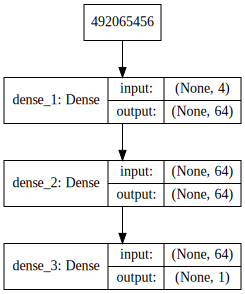

In [14]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

In [15]:
##훈련 결과 중 마지막 5개 확인
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
1995,323295.355114,413.900583,323295.355114,300378.25000,489.452087,300378.25000,1995
1996,323133.699811,413.701860,323133.699811,299310.65625,488.522919,299310.65625,1996
1997,323074.397727,413.454333,323074.397727,297971.84375,487.406586,297971.84375,1997
1998,322957.162405,413.088612,322957.162405,298789.09375,488.257019,298789.09375,1998
1999,322959.916667,413.320116,322959.916667,302012.62500,491.217834,302012.62500,1999


In [16]:
##모델 시각화
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [17]:
##예측 수행
test_predictions = model.predict(normed_test_data).flatten()

##데이터 프레임 생성( 별도)
predictValues = pd.DataFrame(list(test_predictions),columns=["PREDICT"])
finalResult = pd.concat([test_dataset,predictValues],axis=1)
finalResult.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_YN,PROMOTION_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1188.935059
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1188.935059
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,298.511475
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1886.572266
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1886.572266


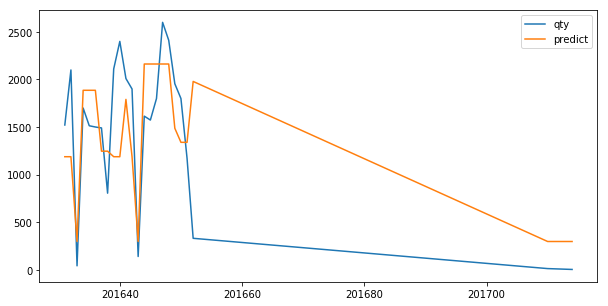

In [18]:
##예측결과 비교
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(finalResult["YEARWEEK"], finalResult.QTY, label = "qty")
plt.plot(finalResult["YEARWEEK"], finalResult.PREDICT, label = "predict")
plt.legend(loc=0)

### 딥러닝 모형 실습 - classification

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
%matplotlib inline

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


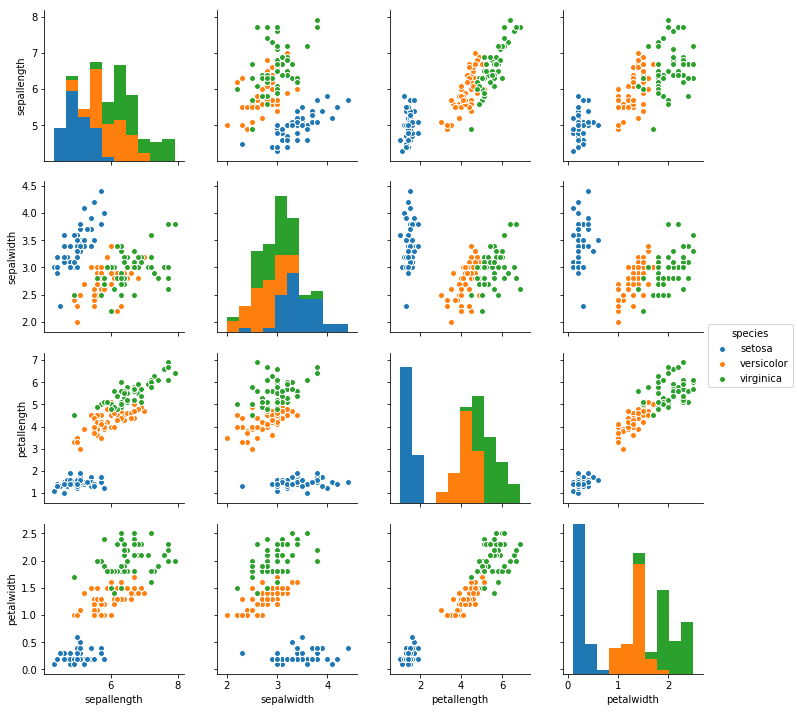

In [20]:
## seed값 설정
seed = 21
numpy.random.seed(seed)
tf.set_random_seed(seed)

##데이터 입력
df = pd.read_csv('./data/IRIS.csv')
df.columns = df.columns.str.lower()
print(df["species"].drop_duplicates())

##그래프로 확인
sns.pairplot(df,hue='species');
plt.show()

In [21]:
##데이터 분리
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [22]:
##모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [34]:
##에러율 정지 단 옵션 유지
early_stopping_monitor = EarlyStopping(patience=2)
#train model
hist = model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=[early_stopping_monitor])

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 0s 162us/step - loss: 0.8684 - acc: 0.7292 - val_loss: 1.0796 - val_acc: 0.5417
Epoch 2/50
96/96 [==============================] - 0s 0us/step - loss: 0.8077 - acc: 0.7292 - val_loss: 0.9870 - val_acc: 0.5417
Epoch 3/50
96/96 [==============================] - 0s 0us/step - loss: 0.7356 - acc: 0.7292 - val_loss: 0.8752 - val_acc: 0.5417
Epoch 4/50
96/96 [==============================] - 0s 162us/step - loss: 0.6697 - acc: 0.7292 - val_loss: 0.7715 - val_acc: 0.5417
Epoch 5/50
96/96 [==============================] - 0s 42us/step - loss: 0.6218 - acc: 0.7604 - val_loss: 0.6898 - val_acc: 0.7083
Epoch 6/50
96/96 [==============================] - 0s 42us/step - loss: 0.5867 - acc: 0.8750 - val_loss: 0.6393 - val_acc: 0.8750
Epoch 7/50
96/96 [==============================] - 0s 52us/step - loss: 0.5508 - acc: 0.9271 - val_loss: 0.6171 - val_acc: 0.7917
Epoch 8/50
96/96 [=====================

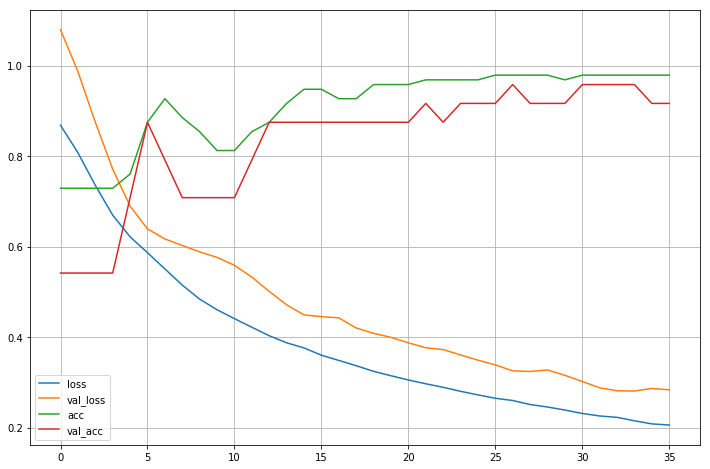

In [35]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
plt.grid()
plt.show()

In [36]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 520us/step
Accuracy = 0.87


### 시계열 모형 실습 - Arima Model

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import api 
from statsmodels.tsa.api import ExponentialSmoothing ,SimpleExpSmoothing 
from statsmodels.tsa.arima_model import ARIMA
import scipy
from scipy.optimize import minimize 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
selloutData = pd.read_csv('./data/sample_kopo.csv')
selloutData.columns = selloutData.columns.str.upper()
selloutData.head()

sortKey = ["SUBSIDIARY","PRODUCT","MODEL","YEAR","MON"]
sortedData = selloutData.sort_values(sortKey)
sortedData.reset_index(drop=True,inplace=True)
sortedData.head()

,YEAR,MONTH,REGION,SUBSIDIARY,PRODUCT,BRAND,MODEL,MODEL_GROUP,CAPA,FEATURE,SALES_QTY,SALES_PRICE,MON
0,2017,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0001,MODELG0001,267,FEATURE2,1,1271,4
1,2017,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0002,MODELG0002,268,FEATURE2,10,8498,4
2,2017,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0005,MODELG0005,266,FEATURE2,2,2023,4
3,2017,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0008,MODELG0008,264,FEATURE2,1,1311,4
4,2014,JAN,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0013,MODELG0013,348,FEATURE1,1,690,1


In [28]:
groupKey = ["SUBSIDIARY","PRODUCT","MODEL"]
sortedData.groupby(groupKey)[["SALES_QTY"]].count().SALES_QTY.max()

40

In [29]:
def groupCountDf(eachGroup):
    #eachGroup = groupData.get_group(list(groupData.group)[5])
    eachGroup["KNOB"] = eachGroup["SALES_QTY"].count()
    return eachGroup
groupKey = ["SUBSIDIARY","PRODUCT","MODEL"]
groupResult = sortedData.groupby(groupKey).apply(groupCountDf)
maxKnob = groupResult["KNOB"].max()
maxKnob

40

In [30]:
##최대 maxKnob존재 데이터만 필터링
refinedData = groupResult[groupResult.KNOB >= maxKnob]
refinedData["YEARMON"] = refinedData["YEAR"].astype(str) + refinedData["MON"].astype(str).str.zfill(2)

C:\Users\SMART-24\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
##ets머신러닝 사용
YEARMON_STD = 201601
def sub_function(data):
    data.reset_index(inplace=True,drop=True)
    trainData = data[data["YEARMON"].astype(int)<YEARMON_STD].reset_index(drop = True)
    testData = data[data["YEARMON"].astype(int)>=YEARMON_STD].reset_index(drop = True)
    trainCount = len(trainData)
    testCount = len(testData)
    y = trainData[['SALES_QTY']].astype(float)
    M = 'multiplicative'
    
    ##모델적용
    ets_model = ExponentialSmoothing(y.values, trend=None, seasonal=M, seasonal_periods=12 )
    ets_fit = ets_model.fit(optimized='True')
    yhPredict = ets_fit.predict(start=trainCount+1,end=trainCount+testCount)
    ##예측데이터 데이터프레임화 후 testData에 밀어넣음
    yh = pd.DataFrame(data = yhPredict,columns = ["predict"])
    testData["PREDICT"] = yh
    return testData

In [32]:
forecatsData = refinedData.groupby(groupKey).apply(sub_function).reset_index(drop=True)

C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\SMART-24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization faile

In [37]:
forecatsData.head()

,YEAR,MONTH,REGION,SUBSIDIARY,PRODUCT,BRAND,MODEL,MODEL_GROUP,CAPA,FEATURE,SALES_QTY,SALES_PRICE,MON,KNOB,YEARMON,PREDICT
0,2016,JAN,Europe,SUBSIDIARY1,PRODUCT1,BRAND1,MODEL0037,MODELG0037,264,FEATURE4,2,1130,1,40,201601,15.856461
1,2016,FEB,Europe,SUBSIDIARY1,PRODUCT1,BRAND1,MODEL0037,MODELG0037,264,FEATURE4,4,2529,2,40,201602,7.667718
2,2016,MAR,Europe,SUBSIDIARY1,PRODUCT1,BRAND1,MODEL0037,MODELG0037,264,FEATURE4,1,650,3,40,201603,7.706097
3,2016,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND1,MODEL0037,MODELG0037,264,FEATURE4,12,8108,4,40,201604,9.875832
4,2016,MAY,Europe,SUBSIDIARY1,PRODUCT1,BRAND1,MODEL0037,MODELG0037,264,FEATURE4,10,7363,5,40,201605,7.728999


In [39]:
##결과 시각화 그룹바이 디버깅 시각화
groupNewCustomerData = forecatsData.groupby(groupKey)
len(groupNewCustomerData)

83

In [41]:
#14개의 그룹 중 첫번째 그룹을 가져옴
eachGroup = groupNewCustomerData.get_group(list(groupNewCustomerData.groups)[27])
eachGroup

,YEAR,MONTH,REGION,SUBSIDIARY,PRODUCT,BRAND,MODEL,MODEL_GROUP,CAPA,FEATURE,SALES_QTY,SALES_PRICE,MON,KNOB,YEARMON,PREDICT
432,2016,JAN,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,2895,1327321,1,40,201601,1628.999986
433,2016,FEB,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1143,536862,2,40,201602,1324.499984
434,2016,MAR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1142,535372,3,40,201603,1158.499992
435,2016,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1184,579318,4,40,201604,1726.999987
436,2016,MAY,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1731,854017,5,40,201605,1684.499988
437,2016,JUN,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,2171,1034094,6,40,201606,2709.999983
438,2016,JUL,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,2744,1295800,7,40,201607,1675.999993
439,2016,AUG,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1432,678045,8,40,201608,1543.000012
440,2016,SEP,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1553,716867,9,40,201609,2059.000022
441,2016,OCT,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1360,624154,10,40,201610,1161.500004


In [43]:
#치솟는 값이 있어서 시각화가 힘들어져 걸러낸다
eachGroup1 = eachGroup[eachGroup['PREDICT'] < 2000]
eachGroup1

,YEAR,MONTH,REGION,SUBSIDIARY,PRODUCT,BRAND,MODEL,MODEL_GROUP,CAPA,FEATURE,SALES_QTY,SALES_PRICE,MON,KNOB,YEARMON,PREDICT
432,2016,JAN,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,2895,1327321,1,40,201601,1628.999986
433,2016,FEB,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1143,536862,2,40,201602,1324.499984
434,2016,MAR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1142,535372,3,40,201603,1158.499992
435,2016,APR,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1184,579318,4,40,201604,1726.999987
436,2016,MAY,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1731,854017,5,40,201605,1684.499988
438,2016,JUL,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,2744,1295800,7,40,201607,1675.999993
439,2016,AUG,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1432,678045,8,40,201608,1543.000012
441,2016,OCT,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1360,624154,10,40,201610,1161.500004
442,2016,NOV,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1050,498268,11,40,201611,1374.499984
444,2017,JAN,Europe,SUBSIDIARY1,PRODUCT1,BRAND2,MODEL0393,MODELG0393,286,FEATURE2,1440,635998,1,40,201701,1628.999986


<function matplotlib.pyplot.show>

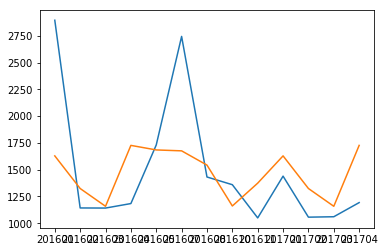

In [46]:
#실제값과 예측값 시각화 비교
plt.plot(eachGroup1['YEARMON'],eachGroup1['SALES_QTY'])
plt.plot(eachGroup1['YEARMON'],eachGroup1['PREDICT'])
plt.show

In [48]:
##정확도 측정
mean_squared_error(forecatsData['SALES_QTY'], forecatsData['PREDICT'])

66076.19861733292

In [50]:
mean_absolute_error(forecatsData['SALES_QTY'], forecatsData['PREDICT'])

132.74843504695266

In [51]:
#csv로 보내기
##forecastData.to_csv('ets.csv',index = False)